In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = Path('drive/My Drive/dataset')

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='./train', test='./test', valid_pct=0.1,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

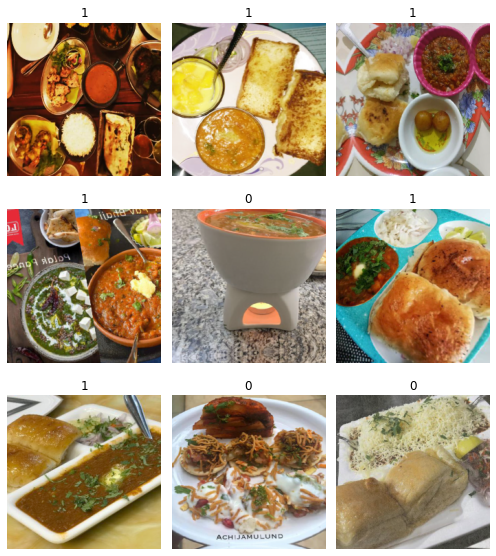

In [5]:
data.show_batch(rows=3, figsize=(7, 8))

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [7]:
defaults.device = torch.device('cuda')
learn.fit_one_cycle(5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


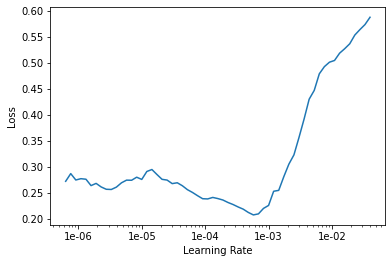

In [8]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(5, max_lr=slice(1e-4, 1e-3))

In [18]:
learn.save('detection-stage-1')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

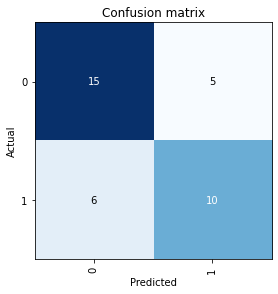

In [20]:
interp.plot_confusion_matrix()

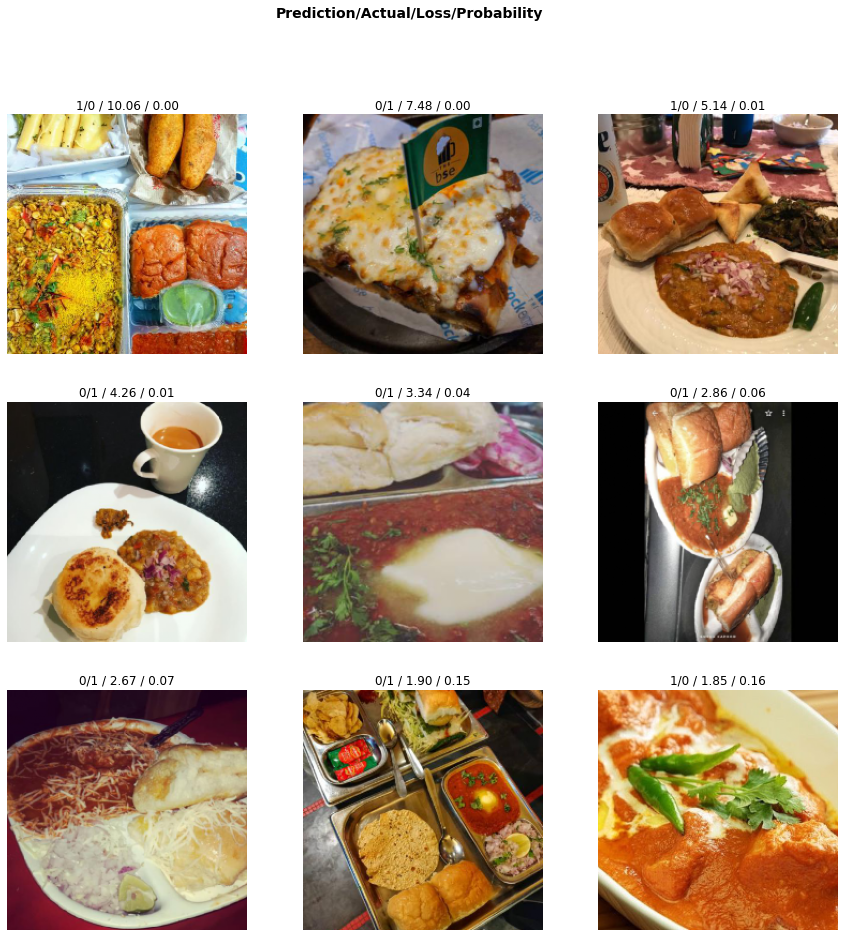

In [21]:
interp.plot_top_losses(9, figsize=(15,15))

In [22]:
learn.validate(data.valid_dl)

[1.2029316, tensor(0.6944)]

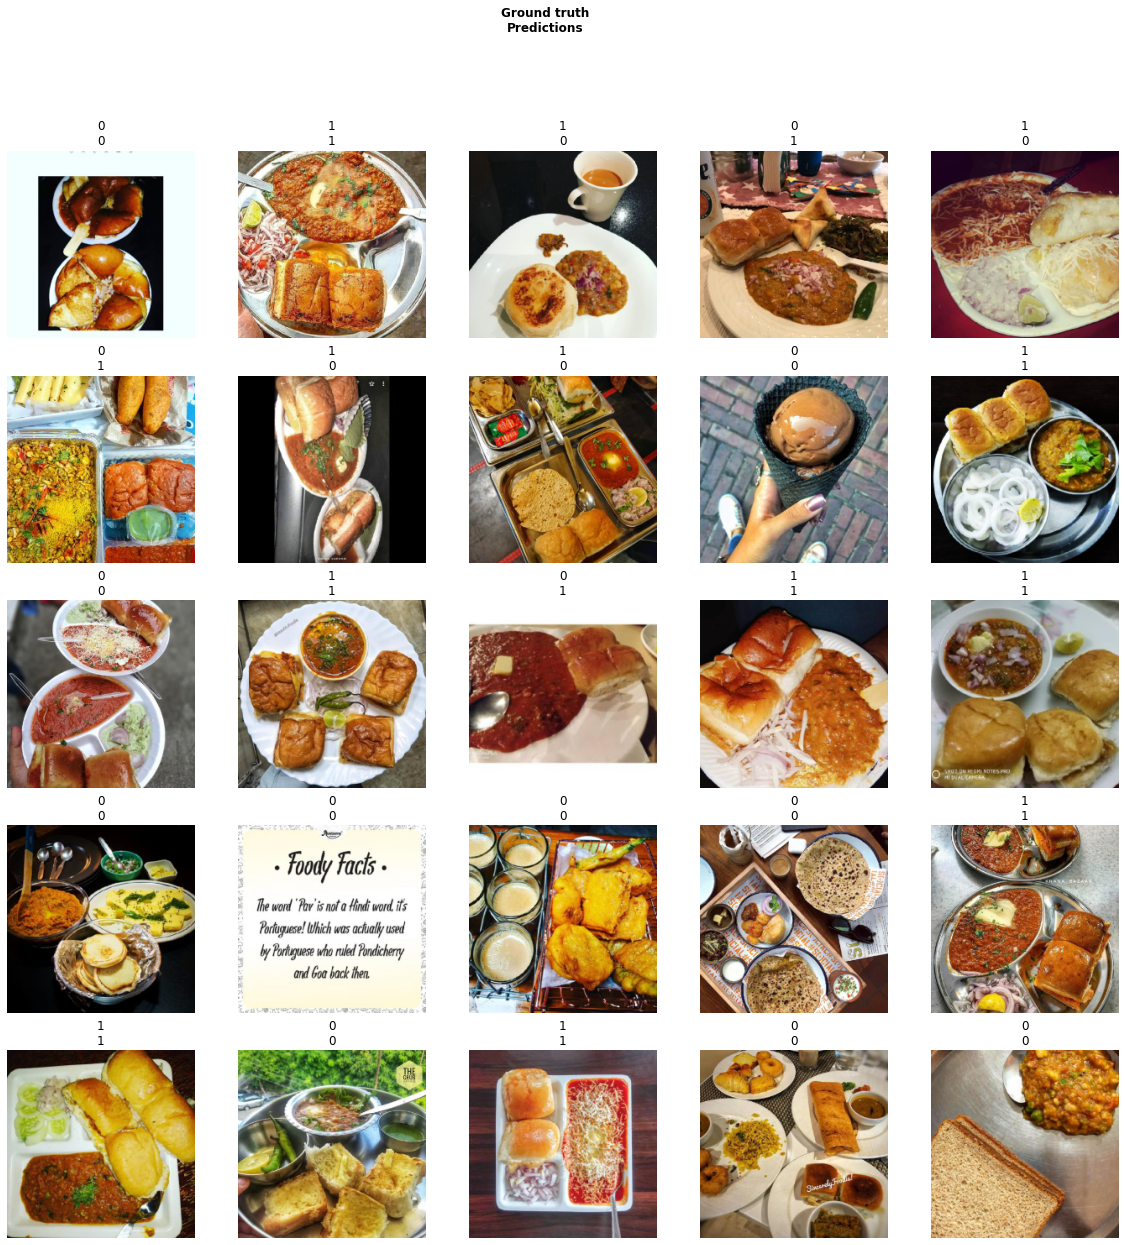

In [23]:
learn.show_results()